In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_6_matrices.ipynb")

# Using matrices

Do a small number of matrix transformations "by hand" to understand what they do. These are the first few transforms you'll need in the lab and homework. Note that, in those assignments, you'll be doing these transforms in functions in order to build up to doing a robot arm reaching goal.


See Lecture slides for matrix information: https://docs.google.com/presentation/d/12p3VOVT5yL14-1z5T20hTscpVC0hsxjtvMLHmQLFITk/edit?usp=sharing

See Lab slides for expected results: https://docs.google.com/presentation/d/1Ut5RnIKU8DF8k_joGXp4tJ1FzBKNIX8JYRE9wkIP_qE/edit?usp=sharing

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Slightly different import format here - this gets just those routines by name (no mr.)
from matrix_routines import make_scale_matrix, make_translation_matrix, make_rotation_matrix

# The same plot functions as were used in the tutorial
from matrix_routines import plot_pts, plot_axes_and_big_box

### Make a square.

TODO: Create a numpy array of points that form a square. The square should go from -1 to 1.


In [3]:
# The numpy array for the points for a square
pts_square = np.ones((3, 4))

# TODO Set the four points to be the corners of a square. Start in the lower left (at -1, -1) and go 
#  clockwize (i.e, the second point is at 1, -1)

pts_square[0:2, 0] = [-1, -1]
pts_square[0:2, 1] = [1, -1]
pts_square[0:2, 2] = [1, 1]
pts_square[0:2, 3] = [-1, 1]

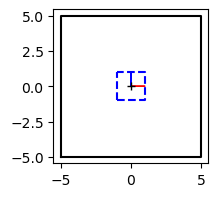

In [4]:
# Draw the square in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the square. Should go from -1 to 1
plot_pts(axs, pts_square, fmt="--b")

In [5]:
grader.check("make_square")

make_square results: All test cases passed!

### Arm link

Create a matrix that makes a rectangle from the square. See picture in slides
- The left hand side of the rectangle should lie on the x=0 line
- The long direction of the rectangle should be **link_length** and point to the right
- The narrow direction of the rectangle should be **link_width** and be centered on the y axis

In [6]:
# You can always start with an identity matrix that doesn't transform (it's like multiplying by 1)
mat_shape_square_big = np.identity(3)

link_length = 3.5
link_width = 2.5
# TODO: Create a matrix that will scale and translate the square to make the desired rectangle
#   Try scaling first, then translate after the scale
#   Remember that the original square goes from -1 to 1, so it's width/height is actually 2
#   Also remember that the matrix on the right is the one that is applied first

mat_shape_square_big = np.array([[link_length/2, 0, link_length/2],
                        [0, link_width/2, 0],
                        [0, 0, 1]])

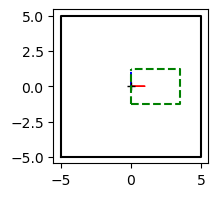

In [7]:
# Plot the result - see slides
# Draw the square in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the transformed square
plot_pts(axs, mat_shape_square_big @ pts_square, fmt="--g")

In [8]:
grader.check("long_skinny_rect")

long_skinny_rect results: All test cases passed!

## Rotate the link

Now rotate the link around it's base by -25 degrees

Notice that this matrix is pre-pended to the existing one - it rotates *after* the scale and translate

In [9]:
# You can always start with an identity matrix that doesn't transform (it's like multiplying by 1)
mat_rotate_link_big = np.identity(3)

# TODO: Build a rotation matrix - the reason we put the link with the left side at 0,0 is so that this rotation causes
#   the link to pivot around the base, not the middle of the long rectangle
#   Don't forget that the make_rotation_matrix function takes radians, not degrees...
rad = np.deg2rad(-25)
mat_rotate_link_big = np.array([[np.cos(rad), -np.sin(rad), 0],
                                [np.sin(rad), np.cos(rad), 0],
                                [0, 0, 1]])

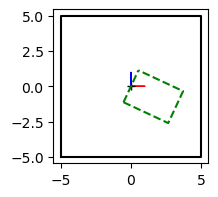

In [10]:
# Plot the result - see slides
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the transformed square - notice that we string the matrices together here
#   In the Lab you'll be building the mat_shape_square_* separately from the rotations because you'll scale all of the
#   geoemtry first, then roatate all of the links to put them together
plot_pts(axs, mat_rotate_link_big @ mat_shape_square_big @ pts_square, fmt="--g")

In [11]:
grader.check("Rotate_link")

Rotate_link results: All test cases passed!

### Make a smaller link and rotate it

TODO
- Make a matrix to scale and translate the square again, this time making it *link_length_small* and *link_width_small*
- Make a matrix to rotate it by 60 degrees

In [12]:
# Build these two the same way you did above
mat_shape_square_small = np.identity(3)
mat_rotate_link_small = np.identity(3)

link_length_small = 1.5
link_width_small = 0.5

# TODO: edit the two above matrices
mat_shape_square_small = np.array([[link_length_small/2, 0, link_length_small/2],
                        [0, link_width_small/2, 0],
                        [0, 0, 1]])
rad_small = np.deg2rad(60)
mat_rotate_link_small = np.array([[np.cos(rad_small), -np.sin(rad_small), 0],
                                [np.sin(rad_small), np.cos(rad_small), 0],
                                [0, 0, 1]])

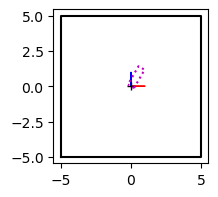

In [13]:
# Plot the result - see slides
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
plot_axes_and_big_box(axs)

# Plot the transformed square - notice that we string the matrices together here
#   In the Lab you'll be building the mat_shape_square_* separately from the mat_rotate_link because you'll scale all of the
#   geoemtry first, then roatate all of the links to put them together
plot_pts(axs, mat_rotate_link_small @ mat_shape_square_small @ pts_square, fmt=":m")

In [14]:
grader.check("make_smaller_link")

make_smaller_link results: All test cases passed!

### Attach the smaller link to the bigger one and rotate both

TODO
- Make a matrix to translate the base of the smaller link to the end of the big one *before* it is rotated
- Now rotate both the little one and the big one by the -25 degrees (so they rotate together)

In [15]:
# TODO One more matrix - define this matrix so that it translates the base (0,0) of the smaller link to the end of the larger link BEFORE
#  it is rotated. This should be a translation by link_length, 0 
mat_move_small_to_end_of_big = np.identity(3)

mat_move_small_to_end_of_big = np.array([[1, 0, link_length],
                                 [0, 1, 0],
                                 [0, 0, 1]])

In [16]:
# TODO We're going to build a matrix for each link that puts it in the "right" place (the right-most images)
#    DO NOT call make_*_matrix here - use the matrices you've made in the previous problems
#      (mat_rotate_link_big, mat_rotate_link_small, mat_move_small_to_end_of_big)
#  Set the big one to be just the rotate matrix for the big link that you made earlier
mat_pose_big = np.identity(3)
# This one is built from three matrices: 
#   - Rotate by the rotate matrix for the small link
#   - Translate to the end of the big link
#   - Rotate by the rotate matrix for the big link
mat_pose_small = np.identity(3)

mat_pose_big = mat_rotate_link_big

mat_pose_small = mat_rotate_link_big @ mat_move_small_to_end_of_big @ mat_rotate_link_small

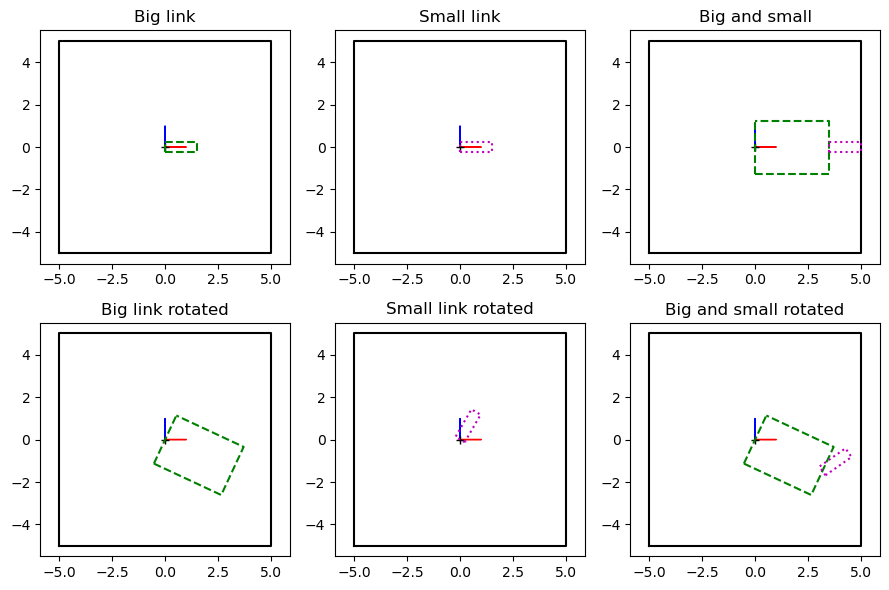

In [17]:
# Plot the result - see slides for what this should look like
#    This will only look correct when all of the matrices used below are correct
#    Do NOT edit this code - if your matrices are correct then this will plot correctly
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))

# A framing window
for i in range(0, n_rows * n_cols):
    plot_axes_and_big_box(axs[i // n_cols, i % n_cols])

# Plot the transformed square - notice that we string the matrices together here
#   In the Lab you'll be building the mat_shape_square_* separately from the matrices that rotate and translate (the "pose")
# The big link before rotating (just the shape transform)
plot_pts(axs[0, 0], mat_shape_square_small @ pts_square, fmt="--g")
axs[0, 0].set_title("Big link")

# The small link before rotating (just the shape transform)
plot_pts(axs[0, 1], mat_shape_square_small @ pts_square, fmt=":m")
axs[0, 1].set_title("Small link")

# The big and small link before rotating, but the small link translated to the end of the big
plot_pts(axs[0, 2], mat_shape_square_big @ pts_square, fmt="--g")
plot_pts(axs[0, 2], mat_move_small_to_end_of_big @ mat_shape_square_small @ pts_square, fmt=":m")
axs[0, 2].set_title("Big and small")

# Now with rotations
# The big link before rotating
plot_pts(axs[1, 0], mat_rotate_link_big @ mat_shape_square_big @ pts_square, fmt="--g")
axs[1, 0].set_title("Big link rotated")
# The small link before rotating
plot_pts(axs[1, 1], mat_rotate_link_small @ mat_shape_square_small @ pts_square, fmt=":m")
axs[1, 1].set_title("Small link rotated")

# Ensuring that the little link rotates with the big one - notice the re-use of the big link rotation matrix
plot_pts(axs[1, 2], mat_pose_big @ mat_shape_square_big @ pts_square, fmt="--g")
plot_pts(axs[1, 2], mat_pose_small @ mat_shape_square_small @ pts_square, fmt=":m")
axs[1, 2].set_title("Big and small rotated")

fig.tight_layout()

In [18]:
grader.check("move_smaller_link")

move_smaller_link results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [19]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS I25 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 1.5

In [20]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Restart. Runall. Did I mention that? If the plots are not visible we can't grade them...

- Submit just this .ipynb file through gradescope, Lecture activity 6 matrices
- We will supply matrix_routines.py for you (it won't break anything if you do include it)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

The Gradescope grader rarely breaks for this one. Provided you turn in this .ipynb file